In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#X_train = pd.read_pickle('train_max_x', compression='zip')
X_train = pd.read_pickle('test_max_x')

In [2]:
X_train = X_train.astype('uint8')
X_train = X_train/255
X_train_copy = X_train.copy()

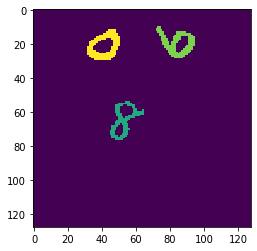

In [8]:
from sklearn.cluster import KMeans
import matplotlib

for i in range(5,6):
    X_image = X_train[i].copy()
    X_image_copy = X_train_copy[i].copy()
    coordinates = []
    coordinates_add = []

    for x in range(128):
        for y in range(128):
            if X_image[x][y] == 1:
                coordinates.append([x,y])
            elif 0 <= X_image_copy[x][y] < 1:
                coordinates_add.append([x,y])

                
                
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(coordinates)
    y_kmeans = kmeans.predict(coordinates)
    
    number_one = []
    number_two = []
    number_three = []
    x_min = 128
    y_min = 128
    x_max = 0
    y_max = 0
    row = []
    col = []

    for label in range(len(y_kmeans)):
        if y_kmeans[label] == 0.:
            number_one.append(coordinates[label])
        elif y_kmeans[label] == 1.:
            number_two.append(coordinates[label])
        else:
            number_three.append(coordinates[label])
    
    """
    for coordinates in [number_one, number_two, number_three]:
        for i in range(len(coordinates)):
            if coordinates[i][0] < x_min:
                x_min = coordinates[i][0]
            if coordinates[i][1] < y_min:
                y_min = coordinates[i][1]
            if coordinates[i][0] > x_max:
                x_max = coordinates[i][0]
            if coordinates[i][1] > y_max:
                y_max = coordinates[i][1]
        for i in range(len(coordinates_add)) :
            if x_max >= coordinates_add[i][0] >= x_min and y_max >= coordinates_add[i][1] >= y_min:
                coordinates.append(coordinates_add[i])
        x_min = 128
        y_min = 128
        x_max = 0
        y_max = 0
    """

        
    new_image = np.zeros((128,128))
    value = 255.
    for old_image in [number_one, number_two, number_three]:
        for i in range(128):
            for j in range(128):
                if [i,j] in old_image:
                    new_image[i][j] = value
        value = value - 50
    plt.imshow(new_image)
    plt.show()
    matplotlib.image.imsave('clustered_number.png', new_image)

In [7]:
from sklearn.cluster import KMeans

X_train_image = []
for i in range(len(X_train)):
    X_image = X_train[i].copy()
    X_image_copy = X_train_copy[i].copy()
    coordinates = []
    coordinates_add = []

    for x in range(128):
        for y in range(128):
            if X_image[x][y] == 1:
                coordinates.append([x,y])
            elif 0 <= X_image_copy[x][y] < 1:
                coordinates_add.append([x,y])

                
                
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(coordinates)
    y_kmeans = kmeans.predict(coordinates)
    
    number_one = []
    number_two = []
    number_three = []
    x_min = 128
    y_min = 128
    x_max = 0
    y_max = 0
    row = []
    col = []

    for label in range(len(y_kmeans)):
        if y_kmeans[label] == 0.:
            number_one.append(coordinates[label])
        elif y_kmeans[label] == 1.:
            number_two.append(coordinates[label])
        else:
            number_three.append(coordinates[label])
    
    
    for coordinates in [number_one, number_two, number_three]:
        for i in range(len(coordinates)):
            if coordinates[i][0] < x_min:
                x_min = coordinates[i][0]
            if coordinates[i][1] < y_min:
                y_min = coordinates[i][1]
            if coordinates[i][0] > x_max:
                x_max = coordinates[i][0]
            if coordinates[i][1] > y_max:
                y_max = coordinates[i][1]
        for i in range(len(coordinates_add)) :
            if x_max >= coordinates_add[i][0] >= x_min and y_max >= coordinates_add[i][1] >= y_min:
                coordinates.append(coordinates_add[i])
        x_min = 128
        y_min = 128
        x_max = 0
        y_max = 0 

        
    new_image = np.zeros((128,128))            
    for old_image in [number_one, number_two, number_three]:
        for i in range(128):
            for j in range(128):
                if [i,j] in old_image:
                    new_image[i][j] = X_image_copy[i][j]
    #plt.imshow(new_image)
    #plt.show()
    X_train_image.append(new_image)


KeyboardInterrupt: 